In [131]:
import csv
from datetime import datetime
import numpy as np
import pandas as pd
import random
import re
import os
from IPython.display import display
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
sns.set_context('talk')

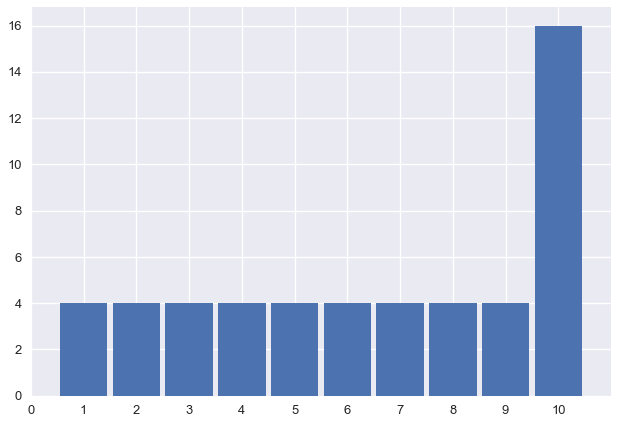

In [132]:
with open('card_draw.csv','r') as f:
    card_deck = pd.read_csv('card_draw.csv')
bins = [0,1,2,3,4,5,6,7,8,9,10] 
counts = np.bincount(card_deck['score'])
fig, ax = plt.subplots()
ax.bar(range(1,len(counts)), counts[1:], width=0.9, align='center')
ax.set(xticks=range(11), xlim=[0, 11])
plt.show()


In [133]:
card_deck['score'].mean()

6.538461538461538

In [134]:
card_deck['score'].median()

7.0

In [135]:
card_deck['score'].std()

3.1836687337621736

In [136]:
def gen_value(x):
    return random.randint(1,13)

In [137]:
def gen_card_score(x):
    card_value = gen_value(x)
    if card_value == 1:
        return 'A'
    elif card_value == 11:
        return 'J'
    elif card_value == 12:
        return 'Q'
    elif card_value == 13:
        return 'K'
    else:
        return str(card_value)

In [138]:
def gen_card_suit(x):
    x = random.randint(1,4)
    if x == 1:
        return 'h'
    if x == 2:
        return 'c'
    if x == 3:
        return 'd'
    if x == 4:
        return 's'

In [139]:
def gen_card_draw(x):
    return gen_card_score(x) + gen_card_suit(x)

In [140]:
try:
    os.remove('card_draws_genrerated')
except :
    print('No file to delete')
f_out = 'card_draws_genrerated'

In [141]:
number_of_draws = 500000

with open('card_draws_genrerated', 'w') as f_out:
    out_writer = csv.writer(f_out)
    out_writer.writerow(['draw'])
    for x in range(number_of_draws):
        card_1 = gen_card_draw(x)
        card_2 = gen_card_draw(x)
        while card_1 == card_2:
            card_2 = gen_card_draw(x)
        card_3 = gen_card_draw(x)
        while card_1 == card_3 or card_2 == card_3:
            card_3 = gen_card_draw(x)
        cards_drawn = card_1 +' '+card_2+' '+card_3 
        out_writer.writerow([cards_drawn])

In [142]:
def card_value_from_score(card_value):
    if card_value == 'K':
        return 10
    if card_value == 'Q':
        return 10
    if card_value == 'J':
        return 10
    if card_value == 'A':
        return 1
    return int(card_value)

In [143]:
def card_suit(row, card):
    card_suit = re.findall('[hcds]', row['draw'].split()[card-1])
    return card_suit[0]

In [144]:
def card_score(row, card):
    card_score = re.findall('[0-9,A,J,K,Q]+', row['draw'].split()[card-1])
    return card_score[0]

In [145]:
def card_value(row, card):
    card_score = re.findall('[0-9,A,J,K,Q]+', row['draw'].split()[card-1])[0]
    card_value = card_value_from_score(card_score)
    return card_value

In [146]:
def total_card_value(row):
    total_card_value = row['card_1_value'] + row['card_2_value'] + row['card_3_value']
    return total_card_value

In [147]:
card_data_max = pd.read_csv('card_draws_genrerated')
display(card_data_max.head(3))

card_data_max['card_1_suit'] = card_data_max.apply(card_suit, card=1, axis=1)
card_data_max['card_2_suit'] = card_data_max.apply(card_suit, card=2, axis=1)
card_data_max['card_3_suit'] = card_data_max.apply(card_suit, card=3, axis=1)

card_data_max['card_1_score'] = card_data_max.apply(card_score, card=1, axis=1)
card_data_max['card_2_score'] = card_data_max.apply(card_score, card=2, axis=1)
card_data_max['card_3_score'] = card_data_max.apply(card_score, card=3, axis=1)

card_data_max['card_1_value'] = card_data_max.apply(card_value, card=1, axis=1)
card_data_max['card_2_value'] = card_data_max.apply(card_value, card=2, axis=1)
card_data_max['card_3_value'] = card_data_max.apply(card_value, card=3, axis=1)

card_data_max['total_card_value'] = card_data_max.apply(total_card_value, axis=1)

,draw
0,Ks 8c As
1,Kh Js 10s
2,6c Jc 7d


31

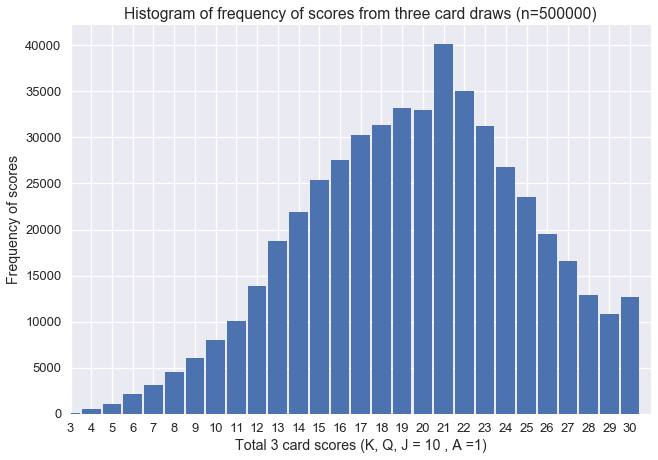

In [148]:
counts = np.bincount(card_data_max['total_card_value'])
display(len(counts))
number_draws = len(card_data_max)
fig, ax = plt.subplots()
ax.bar(range(3,len(counts)), counts[3:], width=0.9, align='center')
ax.set(xticks=range(31), xlim=[3,31])
plt.title('Histogram of frequency of scores from three card draws (n=' + str(number_draws) +')')
plt.xlabel('Total 3 card scores (K, Q, J = 10 , A =1)')
plt.ylabel('Frequency of scores')
plt.show()